# This is a text classification project using Natural Language Processing technique. The text classification is part of an online paid classification task. The data was gathered from performing the online tasks and recording the data.
# The data gathered was only the data that had over 80% accuracy.    

In [1]:
#importing pandas for reading in our data
import pandas as pd

In [2]:
#reading in our data
df= pd.read_csv('taac_assistant_taac_7.csv')

In [3]:
#displaying the data
df.head()

,TaskId,User_Search_Term,Ad,Website,Relevance
0,1,wwww ncquickpass com,Nc Quick Pass - Pay Your Bill Online,www.doxo.com/pay/nc-quick-pass,Other
1,2,peloton plano tx,Studio Cycle Comparison - Find The Best Exerci...,www.nordictrack.com/Studio-Cycles/S22i,Other
2,3,antelope canyon,Hotels near Antelope Canyon - 100% Real Custom...,www.booking.com/Antelope-Canyon/Hotels,Other
3,4,get vaccine after covid,Janssen COVID-19 Vaccine - Authorized For Emer...,www.janssencovid19vaccine.com,Other
4,5,ahs.com/my-accountlogin,Find First american home warranty login - Chec...,www.searchandshopping.org/Your Search/Results,Other


In [4]:
#Converting the Relevance to numerical values to enable analysis
#Convert Relevance to numerical
mapping = {
    'Good' : 1,
    'Other' : 0,
}
df['Relevance'] = df['Relevance'].replace(mapping)
df.head(10)

,TaskId,User_Search_Term,Ad,Website,Relevance
0,1,wwww ncquickpass com,Nc Quick Pass - Pay Your Bill Online,www.doxo.com/pay/nc-quick-pass,0
1,2,peloton plano tx,Studio Cycle Comparison - Find The Best Exerci...,www.nordictrack.com/Studio-Cycles/S22i,0
2,3,antelope canyon,Hotels near Antelope Canyon - 100% Real Custom...,www.booking.com/Antelope-Canyon/Hotels,0
3,4,get vaccine after covid,Janssen COVID-19 Vaccine - Authorized For Emer...,www.janssencovid19vaccine.com,0
4,5,ahs.com/my-accountlogin,Find First american home warranty login - Chec...,www.searchandshopping.org/Your Search/Results,0
5,6,nike,Shop Womens Shops: Amazon - Amazon.com Officia...,www.amazon.com/apparel/womens-shops,1
6,7,cfl fixture,Flashlight Accessories,www.Grainfer.com/Flashlights,0
7,8,nationwide pet insurance,2021's Top 10 Pet Insurance - Buyer's Guide (N...,buyersguide.org/Pet-Insurance,1
8,9,nike,Nike Official Site - Just Do It - Shop The Lat...,www.nike.com,1
9,10,used cars,CarMax Used Cars - Visit carmax.com - Large Na...,www.carmax.com/cars,1


In [5]:
# Check for any missing values
df.isnull().sum().any()

False

In [6]:
# Identify rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Print the rows with missing values
print("Rows with missing values:")
print(rows_with_missing_values)

Rows with missing values:
Empty DataFrame
Columns: [TaskId, User_Search_Term, Ad, Website, Relevance]
Index: []


In [ ]:
## Get the Independent Features

X=df.drop(columns =['TaskId', 'Relevance'])

In [ ]:
## Get the Dependent features
y=df['Relevance']

In [ ]:
y.value_counts()

1    581
0    395
Name: Relevance, dtype: int64

In [ ]:
#The data is imbalanced, so we need to do some balancing.

<Axes: >

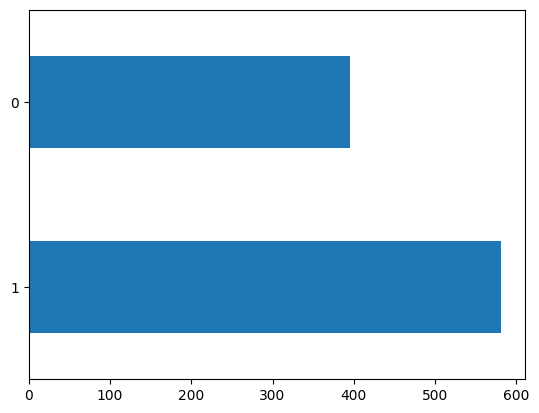

In [ ]:
#Doing a visualization to check the overall distribution of the Relevance values
df["Relevance"].value_counts().plot(kind = 'barh')

In [ ]:
#Determining the shape of the features columns
X.shape

(976, 3)

In [ ]:
#Determining the shape of target column
y.shape

(976,)

In [ ]:
#Installing an updated version of tensorflow for use in deep learning
pip install --upgrade tensorflow

SyntaxError: ignored

In [ ]:
#Importing tensorflow library for use in deep learning
import tensorflow as tf

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
### Vocabulary size
voc_size=1000

Onehot Representation

In [ ]:
messages=X.copy()

In [ ]:
messages['User_Search_Term'][1]

'peloton plano tx'

In [ ]:
messages['Ad'][1]

'Studio Cycle Comparison - Find The Best Exercise Bike - NordicTrack Official Site'

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['User_Search_Term'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
corpus

['wwww ncquickpass com',
 'peloton plano tx',
 'antelop canyon',
 'get vaccin covid',
 'ah com accountlogin',
 'nike',
 'cfl fixtur',
 'nationwid pet insur',
 'nike',
 'use car',
 'car rental lubbock tx',
 'augusta tech adn',
 'hampton inn guntersvil al',
 'white strip',
 'florist laguna beach',
 'rachel ray nylon spoon',
 'dental mouthwash fix teeth',
 'june florist brooklyn',
 'buy marbl floor tile',
 'safeway com',
 'enterpris rent car',
 'flight atlanta fort sill ok',
 'virgin',
 'adob clean',
 'dialysi clinic hire near',
 'best place sell old playboy magazin',
 'comput viru',
 'hepat b',
 'social secur administr',
 'goldman sach platinum',
 'homegood com offici websit',
 'madam pompadour wallpap mural',
 'southwest airlin',
 'cowboy schedul',
 'realmushroom',
 'abbotsford hear center',
 'amazon',
 'aliana health',
 'bilater maxilari sinu diseas',
 'first time homebuy',
 'norton vpn',
 'world educ servic',
 'new ford f regular cab sale near',
 'creat weekli payrol calendar',
 'arch

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[166, 317, 49],
 [919, 460, 633],
 [339, 204],
 [100, 684, 216],
 [555, 49, 334],
 [254],
 [110, 1],
 [335, 163, 784],
 [254],
 [755, 165],
 [165, 347, 864, 633],
 [785, 28, 740],
 [850, 371, 672, 579],
 [825, 961],
 [513, 509, 568],
 [156, 903, 298, 678],
 [374, 456, 33, 165],
 [908, 513, 150],
 [2, 259, 598, 816],
 [107, 49],
 [833, 898, 165],
 [993, 896, 201, 538, 155],
 [77],
 [999, 925],
 [524, 284, 755, 840],
 [885, 793, 20, 954, 303, 425],
 [313, 119],
 [589, 469],
 [204, 758, 94],
 [478, 843, 805],
 [965, 49, 185, 334],
 [388, 445, 911, 937],
 [233, 554],
 [503, 615],
 [432],
 [630, 487, 893],
 [434],
 [181, 67],
 [893, 953, 315, 6],
 [493, 243, 419],
 [192, 249],
 [5, 582, 99],
 [812, 572, 947, 783, 305, 816, 840],
 [814, 897, 960, 903],
 [55, 28],
 [784, 987, 564, 99, 678],
 [792, 980, 816],
 [540, 203, 527],
 [320, 89, 106, 195],
 [956, 889, 758, 860],
 [229, 677, 857, 452],
 [504, 563, 308, 532, 534],
 [481, 246, 945, 396, 877],
 [996, 925, 53, 598],
 [973],
 [890, 5, 228]

Embedding Representation

In [ ]:
sent_length=10
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[  0   0   0 ... 166 317  49]
 [  0   0   0 ... 919 460 633]
 [  0   0   0 ...   0 339 204]
 ...
 [  0   0   0 ... 531  38 618]
 [  0   0   0 ...   0 380 550]
 [  0   0   0 ...   0 221 783]]


In [ ]:
embedded_docs[0]

array([  0,   0,   0,   0,   0,   0,   0, 166, 317,  49], dtype=int32)

In [ ]:
## Creating model
embedding_vector_features=10
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 10)            10000     
                                                                 
 lstm (LSTM)                 (None, 5)                 320       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 10326 (40.34 KB)
Trainable params: 10326 (40.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
## Creating model
embedding_vector_features=10
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(5)))
model1.add(Dropout(0.7))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 10)            10000     
                                                                 
 bidirectional (Bidirection  (None, 10)                640       
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10651 (41.61 KB)
Trainable params: 10651 (41.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(976, (976,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((976, 10), (976,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.30, random_state=42)

In [ ]:
# Fit the model with class weights

# Calculate class frequencies
class_counts = np.bincount(y_train)
total_samples = np.sum(class_counts)

# Calculate class weights based on frequencies
class_weights = {class_label: total_samples / (num_samples * len(class_counts)) for class_label, num_samples in enumerate(class_counts)}
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

# Scale the weights to ensure their sum is equal to the number of classes
sum_weights = sum(class_weights.values())
class_weights_normalized = {class_label: weight / sum_weights for class_label, weight in class_weights.items()}

print("Class Weights_2:", class_weights_normalized)

class_weight_dict_2 = dict(enumerate(class_weights_normalized))


Class Weights: {0: 1.2601476014760147, 1: 0.8288834951456311}
Class Weights_2: {0: 0.6032210834553441, 1: 0.39677891654465597}


Model Training

In [ ]:
### Finally Training
#model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=16)

model.fit(X_train, y_train, epochs=10, batch_size=16, class_weight=class_weight_dict_2, validation_data=(X_test, y_test))

Epoch 1/10
43/43 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.6032 - val_loss: 1.4867 - val_accuracy: 0.5768
Epoch 2/10
43/43 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.6032 - val_loss: 1.5406 - val_accuracy: 0.5768
Epoch 3/10
43/43 [==============================] - 0s 7ms/step - loss: 0.0153 - accuracy: 0.6032 - val_loss: 1.5899 - val_accuracy: 0.5768
Epoch 4/10
43/43 [==============================] - 0s 7ms/step - loss: 0.0136 - accuracy: 0.6032 - val_loss: 1.6344 - val_accuracy: 0.5768
Epoch 5/10
43/43 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.6032 - val_loss: 1.6768 - val_accuracy: 0.5768
Epoch 6/10
43/43 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.6032 - val_loss: 1.7153 - val_accuracy: 0.5768
Epoch 7/10
43/43 [==============================] - 0s 7ms/step - loss: 0.0101 - accuracy: 0.6032 - val_loss: 1.7522 - val_accuracy: 0.5768
Epoch 8/10
43/43 [==

Performance Metrics And Accuracy

In [ ]:
y_pred1 = np.argmax(model1.predict(X_test),axis=1)

10/10 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import f1_score
best_threshold = 0.5
best_f1_score = 0

for threshold in np.arange(0.1, 1, 0.05):
    y_pred1 = (model1.predict(X_test) > threshold).astype(int)
    f1 = f1_score(y_test, y_pred1)
    if f1 > best_f1_score:
        best_threshold = threshold
        best_f1_score = f1

print("Best Threshold:", best_threshold)


10/10 [==============================] - 0s 2ms/step
Best Threshold: 0.1


In [ ]:
threshold = 0.5  # Adjust the threshold as needed
y_pred1 = (model1.predict(X_test) > threshold).astype(int)

10/10 [==============================] - 0s 3ms/step


In [ ]:
y_pred1

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[ 82,  42],
       [112,  57]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.47440273037542663

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.42      0.66      0.52       124
           1       0.58      0.34      0.43       169

    accuracy                           0.47       293
   macro avg       0.50      0.50      0.47       293
weighted avg       0.51      0.47      0.46       293



In [ ]:
def predict_rel(predict_relevance):
    concatenated_text = ' '.join(predict_relevance)
    onehot_reprr = [one_hot(concatenated_text.lower(), voc_size)]
    padded = pad_sequences(onehot_reprr, maxlen=sent_length, padding='pre')
    return model1.predict(padded)

predict_relevance = ["nike", "Shop Womens Shops: Amazon - Amazon.com Officia...", "www.amazon.com/apparel/womens-shops"]
predicted_score = predict_rel(predict_relevance)


1/1 [==============================] - 0s 21ms/step


In [ ]:
predicted_score

array([[0.49567997]], dtype=float32)

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st

Saving The Trained Model

In [ ]:
# Assuming 'model' is your trained Keras model
model.save('trained_model_1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pip install keras


In [ ]:
from keras.models import load_model

# Provide the correct file path to your saved model
model_filepath = 'trained_model_1.h5'

# Load the saved model
loaded_model = load_model(model_filepath)


In [ ]:
# Load the saved model
#with open('trained_model.h5', 'rb') as model_file:
    #loaded_model = load_model(model_file)

# Define the text data you want to predict
predict_relevance = ['jaguar usa', 'Visit Jaguar Dealership - Jaguar Dealer - West Houston Jaguar', 'www.jaguarwesthouston.com']

# Call the predict_rel function using the loaded model
predicted_score = predict_rel(predict_relevance)
print(predicted_score)


1/1 [==============================] - 0s 141ms/step
[[0.49649248]]
